In [1]:
import os
import glob
import utils
import create_training_dataset
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import pickle
import pathlib
import shutil

2022-11-22 19:07:10.822096: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-22 19:07:11.058961: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-22 19:07:11.123352: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-22 19:07:11.992499: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
zoom1_normal_mask = "expTraining/zoom1/masks/normal"
zoom1_tumor_mask = "expTraining/zoom1/masks/tumor"
zoom2_normal_mask = "expTraining/zoom2/masks/normal"
zoom2_tumor_mask = "expTraining/zoom2/masks/tumor"

In [3]:
zoom1_normal_mask_npy = glob.glob(f"{zoom1_normal_mask}/*.npy")
zoom1_tumor_mask_npy = glob.glob(f"{zoom1_tumor_mask}/*.npy")
zoom2_normal_mask_npy = glob.glob(f"{zoom2_normal_mask}/*.npy")
zoom2_tumor_mask_npy = glob.glob(f"{zoom2_tumor_mask}/*.npy")
print(len(zoom1_normal_mask_npy))
print(len(zoom1_tumor_mask_npy))
print(len(zoom2_normal_mask_npy))
print(len(zoom2_tumor_mask_npy))

9000
7439
9000
7439


In [4]:
def whether_all_normal_passed(sample_size: int, files: list) -> bool:
    count = 0
    all_passed = True
    for i in tqdm(range(sample_size)):
        mask = np.load(files[i])
        if utils.has_tumor_at_center(mask):
            count += 1
            all_passed = False
    return all_passed, count

def whether_all_tumor_passed(sample_size: int, files: list) -> bool:
    all_passed = True
    for i in tqdm(range(sample_size)):
        mask = np.load(files[i])
        if not utils.has_tumor_at_center(mask):
            print(files[i])
            all_passed = False
            break
    return all_passed

In [5]:
sample_size = len(zoom1_normal_mask_npy)
all_passed, count = whether_all_normal_passed(sample_size, zoom1_normal_mask_npy)
print(f"Zoom level 1 normal pieces all passed: {all_passed}")
print(f"Count of non-passed: {count}")

  0%|          | 0/9000 [00:00<?, ?it/s]

Zoom level 1 normal pieces all passed: True
Count of non-passed: 0


In [6]:
sample_size = len(zoom1_tumor_mask_npy)
all_passed = whether_all_tumor_passed(sample_size, zoom1_tumor_mask_npy)
print(f"Zoom level 1 tumor pieces all passed: {all_passed}")

  0%|          | 0/7439 [00:00<?, ?it/s]

Zoom level 1 tumor pieces all passed: True


In [7]:
sample_size = len(zoom2_normal_mask_npy)
all_passed, count = whether_all_normal_passed(sample_size, zoom2_normal_mask_npy)
print(f"Zoom level 2 normal pieces all passed: {all_passed}")
print(f"Count of non-passed: {count}")

  0%|          | 0/9000 [00:00<?, ?it/s]

Zoom level 2 normal pieces all passed: True
Count of non-passed: 0


In [8]:
sample_size = len(zoom2_tumor_mask_npy)
all_passed = whether_all_tumor_passed(sample_size, zoom2_tumor_mask_npy)
print(f"Zoom level 2 tumor pieces all passed: {all_passed}")

  0%|          | 0/7439 [00:00<?, ?it/s]

Zoom level 2 tumor pieces all passed: True


In [9]:
def remove_ipynb_checkpoints():
    res = pathlib.Path('expTraining').glob('**/*.ipynb_checkpoints')
    for f in res:
        print(f)
        shutil.rmtree(f)
    print("Done")

In [10]:
remove_ipynb_checkpoints()

Done


In [11]:
training_gen, val_gen, train_len, val_len = create_training_dataset.create_train_val_dataset()

Found 13152 images belonging to 2 classes.
Found 3287 images belonging to 2 classes.
Found 13152 images belonging to 2 classes.
Found 3287 images belonging to 2 classes.
{'normal': 0, 'tumor': 1}


(32, 299, 299, 3)
(32, 299, 299, 3)
(32, 2)


Text(0.5, 1.0, 'Zoom Level 2 [1. 0.]')

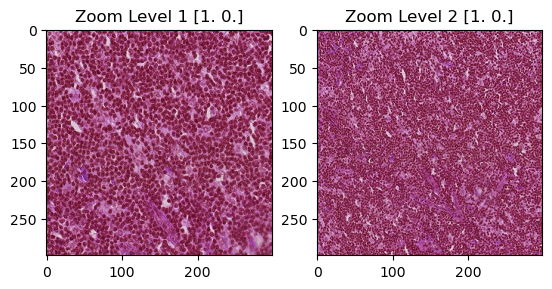

In [12]:
im_batch, label = next(training_gen)
print(im_batch[0].shape)
print(im_batch[1].shape)
print(label.shape)
fig, axs = plt.subplots(1, 2)
axs[0].imshow(im_batch[0][0])
axs[0].set_title(f"Zoom Level 1 {label[0]}")
axs[1].imshow(im_batch[1][0])
axs[1].set_title(f"Zoom Level 2 {label[0]}")